# Project: Traffic Sign Recognition Classifier

### Self-Driving Car Engineer Nanodegree
![alt text](./docs/download.png)





----
## Personal Thoughts

I am excited to work on this project. This is a wonderful opportunity for me to learn about the state-of-the-art technology, Deep Learning.

To tackle this project, I have been studying rigorously during my winter break. Well, the "break" they said. I finally understood what is Neural Network, Convolution Neural Networks, Back-propagation and few techniques to "fine-tune" my network including Adam Gradient Descent, Drop-out, Batch Normalization and Inception. While I understand that this is just a first step to the door, I am gratefully confident about the outcome of this class. 

One important thing to note though: I might be wrong, but I feel that we do not have a quantitative model to validate the performance of CNN on real life. This is critical because human lives will be dependent on these CNNs, in term of autonomous vehicles. I hope I am wrong or we will figure it out soon! By then, it is hard to prove "how safe is safe" because I think 99% is not safe.


Now, let's dive into my steps of how to train the computer regonize Traffic Sign itself. Teehee :d

---
## Step 0: Load The Data

I used 'pickle' to load the data. There are training set and test set in dataset. In a perfect world, DO NOT TOUCH test set until you believe that your network is good enough. 

The way I validated my network is to use cross-validation on minibatches. In particular, for every epoch, I divided my training set into 'BATCH_SIZE' (256) mini-batches. I used 20% of those batches as validation batches. I will go into detail about this in my 'network architechture'.

In [1]:
# Load pickled data
import pickle
# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**



In [2]:
### Replace each question mark with the appropriate value.
n_train = X_train.shape[0]
n_test = X_test.shape[0]
image_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
n_classes = len(set(y_train))
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

## Display few Traffic Sign Samples

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa4ce867a20>,
 <matplotlib.image.AxesImage at 0x7fa4ce7fe588>)

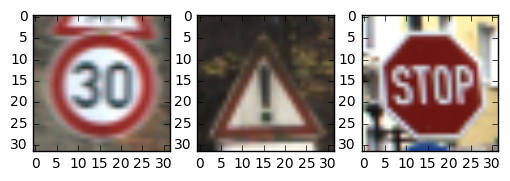

In [4]:
plt.figure(1)
plt.subplot(131), plt.imshow(X_train[1000])
plt.subplot(132), plt.imshow(X_train[26000])
plt.subplot(133), plt.imshow(X_train[22700])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

My proposed pipeline is:
 - Perform data augmentation (rotating, blurring, shifting, shearing, changing brightness)
 - Build CNN (inspired by VGG-16). However, I scaled down the parameters since our size image is : 32x32x3.
 - Train the CNN.
 - Test on new images.
 

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

#### 1. Data Pre-Processing and Data Augmentation

In [5]:
# Perform Data Augmentation
import utils.data_processor as util
from pathlib import Path
import csv

my_file = Path("../train1.p")

if not my_file.is_file():
    # It might take some times. Please be patient
    X_train, y_train = util.augment_data(X_train, y_train)
    # Save new data
    util.save_data({'features': X_train, 'labels': y_train}, '../extended_training_data.p')
else:
    print("Extra data has been already created.")
    
# Map ClassID to traffic sign names
signs = []
with open('signnames.csv', 'r') as csvfile:
    signnames = csv.reader(csvfile, delimiter=',')
    next(signnames,None)
    for row in signnames:
        signs.append(row[1])
    csvfile.close()


Extra data has been already created.


#### 2. Build and Traing The CNN

In [6]:
from traffic_net import TrafficNet

# Create A New Convolutional Neural Nets
conv_net = TrafficNet()

In [7]:
# HYPER-PARAMETERS
EPOCHS = 5
LEARNING_RATE = 0.001
BATCH_SIZE = 256
KEEP_PROP = 0.65
ACCURATE_THRESHOLD = 0.991

train = util.load_data('../data/train.p')
X_train, y_train = train['features'], train['labels']

# Pre-process data
features = X_train/255                                       # scale pixel values to [0, 1]
# labels  = (y_train - len(set(y_train))) / len(set(y_train))  # scale label values to [-1, 1]

# Train the Traffic Sign CNN on training set 
conv_net.train( features, y_train,
                save_loc='./model/vgg.chkpt',
                epochs=EPOCHS, 
                learn_rate=LEARNING_RATE, 
                batch_size=BATCH_SIZE, 
                keep_prob=KEEP_PROP, 
                acc_threshold=ACCURATE_THRESHOLD)

Start training...
Restored Model Successfully.
EPOCH 1: LR: 0.00002339 Validation loss: 0.00003 Validation Accuracy = 0.998
Reached accuracy requirement. Training completed.
Train Model saved

Optimization Finished!! Training time: 00h:00m:06s


#### 3. Test the CNN

In [9]:
test = util.load_data('../data/test.p')
X_test, y_test = test['features'], test['labels']
X_test = X_test/255

#  Test the Traffic_Sign_CNN using test set
conv_net.test(X_test, y_test, model='./model/vgg.chkpt', batch_size=256)


Start Testing...
Restored Model Successfully.
Testing on 12630 samples
Test Accuracy = 0.9561

Finished Testing. Model is not saved


**4. Plot the Result**

Start Predicting...
(12630, 43)
Correct predictions:  95.54235946159937 %
Normalized confusion matrix


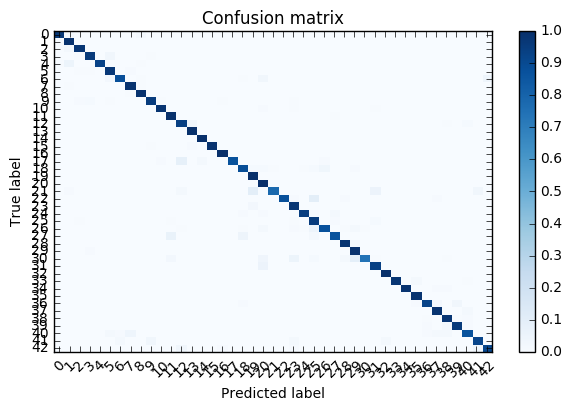

In [11]:
correct_predictions = conv_net.score(X_test, y_test, model='./model/vgg.chkpt', plot=True, normalize=True)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I have scaled images from (0->255) to (0->1) and applied data agumentation as my main pre-process method. I have considered using grayscale and zero-mean. However, the image is look weird when I plotted it so I decided to keep the original image (32x32x3).

All methods related to process data is stored in (utils/data_processor.py). I will go into detail on how I process my data as:

* Why do I think data augmentation important?
  
* How did I augment the data set?
  
* Plot the before/after data set distribution.
  


 ### Why do I think data agumentation is important?

Short answer is data set distribution. Each traffic sign has different amount of data. If the '20KM' traffic sign has more data than '70KM' sign, the network will be more biased toward the '20KM' sign.

Let's look at the data distrubution of German Traffic Sign Data Set

39209 samples


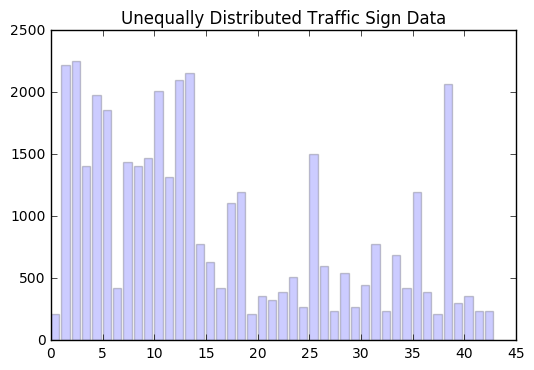

In [12]:
import numpy as np
# Create a barchart of frequencies
item, count = np.unique(y_train, return_counts=True)
freq = np.array((item, count)).T
print('%d samples' % (y_train.shape[0]))
plt.bar(item, count, alpha=0.2)
plt.title('Unequally Distributed Traffic Sign Data')

### How did I perform Data Augmentation?

    1. Define few image transformation methods (rotation, shift, shear, blurr , change gamma).
    2. Define a method (random_transform) to randomly apply multiple transformation on one image
    3. Define a augment_data method to perform data augmentation on original data set

Since the traffic sign samples is not distrubted equally, this could affect the CNN's performance. The network would be biased toward classes with more samples. **Data Augmentation** generates additional data on each traffic sign. For example, if the average sample for each classes is 1000 images. Any class has less than 300 images need to generate more data. 

Data Augmentation includes but not limited to *blurring, rotating, shearing, translating, changing brighness* on original images.
For image transformation, I found this documentation is helpful: http://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html

This library seems promising. However, I want to implement the code once before using it:
https://github.com/aleju/imgaug

---
### 1. Image Transformation Methods

We need to write some methods to transform orginal image. Below are my proposed methods: translation, rotation, affirm transformation, blur, brighten, darken an image.

All the methods will generate new image at different random levels (using numpy.random)

In [13]:
import cv2
import numpy as np

def translate(img):
    "Shift orginal image around within image size"
    x = img.shape[0]
    y = img.shape[1]
    x_shift = np.random.uniform(-0.3 * x, 0.3 * x)
    y_shift = np.random.uniform(-0.3 * y, 0.3 * y)
    shift_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    shift_img = cv2.warpAffine(img, shift_matrix, (x, y))
    return shift_img

def rotate(img):
    " Rotate original image at random rotation angle from -90 degree to +90 degree"
    row, col, channel = img.shape
    angle = np.random.uniform(-90, 90)
    rotation_point = (row / 2, col / 2)
    rotation_matrix = cv2.getRotationMatrix2D(rotation_point, angle, 1)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (col, row))
    return rotated_img

def shear(img):
    " Affirm Transformation orignal image"
    
    x, y, channel = img.shape
    shear = np.random.randint(5,15)
    pts1 = np.array([[5, 5], [20, 5], [5, 20]]).astype('float32')
    pt1 = 5 + shear * np.random.uniform() - shear / 2
    pt2 = 20 + shear * np.random.uniform() - shear / 2
    pts2 = np.float32([[pt1, 5], [pt2, pt1], [5, pt2]])
    M = cv2.getAffineTransform(pts1, pts2)
    result = cv2.warpAffine(img, M, (y, x))
    return result

def blur(img):
    r_int = np.random.randint(0, 2)
    odd_size = 2 * r_int + 1
    return cv2.GaussianBlur(img, (odd_size, odd_size), 0)


def gamma(img):
    gamma = np.random.uniform(0.2, 1.5)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    new_img = cv2.LUT(img, table)
    return new_img

def pre_process(imgs):
    imgs = imgs/255
    return imgs

def random_transform(img):
    # There are total of 6 transformation
    # I will create an boolean array of 6 elements [ 0 or 1]
    a = np.random.randint(0, 2, [1, 5]).astype('bool')[0]
    if a[0] == 1: img = translate(img)
    if a[1] == 1: img = rotate(img)
    if a[2] == 1: img = shear(img)
    if a[3] == 1: img = blur(img)
    if a[4] == 1: img = gamma(img)
        
    return img

Let's test on a sample.

I generate 5 images per transformation on a random image of training set.

In [ ]:
i = 22700
sample_1 = X_train[i]
translated_img = []
rotated_img = []
shear_img = []
blur_img = []
noise_img = []
gamma_img=[]
for i in range(5):
    translated_img.append(translate(sample_1))
    rotated_img.append(rotate(sample_1))
    shear_img.append(shear(sample_1))
    blur_img.append(blur(sample_1))
    gamma_img.append(gamma(sample_1))
    
row = 5
col = 5
plt.figure(2)
plt.subplot(row, col,1), plt.title('Shift')
plt.subplot(row, col,2), plt.title('Rotation')
plt.subplot(row, col,3), plt.title('Shear')
plt.subplot(row, col,4), plt.title('Blur')
plt.subplot(row, col,5), plt.title('Gamma')
for i in range(5):
    pos = 5*i
    plt.subplot(row, col,pos+1), plt.imshow(translated_img[i]),  plt.axis('off')
    plt.subplot(row, col,pos+2), plt.imshow(rotated_img[i]), plt.axis('off') 
    plt.subplot(row, col,pos+3), plt.imshow(shear_img[i]), plt.axis('off')
    plt.subplot(row, col,pos+4), plt.imshow(blur_img[i]), plt.axis('off')  
    plt.subplot(row, col,pos+5), plt.imshow(gamma_img[i]), plt.axis('off')

In [ ]:
# Apply multiple transformations on one image
for j in range(5):
    pos=5*j
    for i in range(8):
        test = random_transform(sample_1)
        plt.subplot(5, 7, pos+i+1), plt.imshow(test), plt.axis('off')

## 2. Generate New Dataset

We have a way to generate additional data now. However, each class in dataset should have different needed amount of additional data.

In this step, I will:
- Separate each class dataset.
- Compare number of dataset to average dataset/class.
- Based on that ration, I will decide to add more/less data into the current class

---
#### 2.1 Separate Traffic Sign Data Set:
For every traffic sign, I decided to place in different arrays so that I could expand these later.

In [ ]:
# Based on that average, we can estimate how many images a traffic sign need to have

total_traffic_signs = len(set(y_train))
# Calculate how many images in one traffic sign
ts, imgs_per_sign = np.unique(y_train, return_counts=True)
avg_per_sign = np.ceil(np.mean(imgs_per_sign)).astype('uint32')

separated_data = []
for traffic_sign in range(total_traffic_signs):
    images_in_this_sign = X_train[y_train == traffic_sign,...]
    separated_data.append(images_in_this_sign)

----
#### 2.2 Generate New Data Set on Each Traffic Sign:

For each mini data set, I used a so-called 'scale-factor' to demtermine how more data should I add to the original dataset. 'Scale-factor' is calculated by (Current Images/Average Images per set)*2 . 


The more data, the merrier. 

**This step takes some time. Be patient :)**

This method has been implemented in  ''utils.data_processor.py''


In [ ]:
# Second, for each dataset, I generate new images randomly based on current total images       
expanded_data = np.array(np.zeros((1, 32,32,3)))
expanded_labels = np.array([0])

for sign, sign_images in enumerate(separated_data):
    scale_factor = (2*(avg_per_sign/imgs_per_sign[sign])).astype('uint32')
    new_images = []

    # Generate new images  <---- Could apply list comprehension here
    for img in sign_images:
        for _ in range(scale_factor):
            new_images.append(random_transform(img))

    # Add old images and new images into 1 array    
    if len(new_images) > 0:
        sign_images = np.concatenate((sign_images, new_images),axis=0)
    new_labels = np.full(len(sign_images),sign, dtype ='uint8')
    # Insert new_images to current dataset
    expanded_data = np.concatenate((expanded_data,sign_images), axis = 0)
    expanded_labels = np.concatenate((expanded_labels, new_labels), axis=0)   

print(expanded_data.shape)
print(expanded_labels.shape)

----
### Compare Before and After Data Augmentation

In [ ]:
# Create a barchart of frequencies
item, count = np.unique(y_train, return_counts=True)
freq = np.array((item, count)).T

print('Before Data Augmentation: %d samples' % (y_train.shape[0]))
plt.figure(1)
plt.bar(item, count, alpha=0.2)
plt.title('Before Data Augmentation: Unequally Distributed Data')

item2, count2 = np.unique(expanded_labels, return_counts=True)
freq2 = np.array((item2, count2)).T

print('After Data Augmentation: %d samples' % (expanded_labels.shape[0]))
plt.figure(2)
plt.bar(item2, count2, alpha=0.2)
plt.title('After Data Augmentation: More Equally Distributed Data')

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I think I have answered this in question 1, I have generated additional data for each traffic sign based on its current amount of data.

I generated extra data because the orginal data set is not equally distributed. On my new data  set, I have applied multiple transformations (blur, rotate, shift, shear) on 1 image (image_processor.py/random_transform()).

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Here is the visualization of how my Convolutional Neural Networks is look like.

In [ ]:
# image here

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
### Weight Initialization:  
 * xavier_initializer (tf.contrib.layers.xavier_initializer())
 
### Optimizer :
 * **Adam Optimizer**: According to CS231n, I found that Adam Optimizer provides good performance compared to others like RMSProp, Adagrad or Momentum.

### Hyper-paramters
 * EPOCHS = 200
 * LEARNING_RATE = 0.001
 * BATCH_SIZE = 256
 * KEEP_PROP = 0.65           
 * ACCURATE_THRESHOLD = 0.990 
 
I used dropout (0.65) to avoid overfitting


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I mostly researched on how to build a good model architecture. However, I think it is a waste. As Andrej mention in [here](http://cs231n.github.io/convolutional-networks/#comp). "Don't be a hero". It is good to see what works best and start from there.

I spent most of the time to figure out how many layers should I use, how many filters should be in 1 convolution layer and waiting for it to train! Mostly  by trial and error. Nevertheless, I satisfy with my network performance.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.

# Load and resize image
import os
test_images = []
path = '../test_images/'
i=1
for image in os.listdir(path):
    img = cv2.imread(path + image)
    img = cv2.resize(img, (32,32))
    test_images.append(img)

# Place test image in np.array
test_images = np.array(test_images)

# Display shape of test images
print(test_images.shape)

In [ ]:
#Display the image

fig = plt.figure()
for i, image in enumerate(test_images):
    grid = plt.subplot(1,len(test_images),i+1)
    grid.imshow(image), plt.axis('off')

In [ ]:
# Use my model to test images
test_images = test_images/255
softmax_scores = conv_net.predict(test_images, saved_model='./model/traffic-net.chkpt')

# From the softmax, I calculated which classID is max.
result = np.array([i.argmax() for i in softmax_scores])
for i in range(len(result)):
    print(signs[result[i]])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.